## Image-Based Emotion Recognition

### Import Libraries

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define constants
IMG_SIZE = 48
BATCH_SIZE = 32
NUM_CLASSES = 7
NUM_EPOCHS = 10
TIME_STEPS = 48 // 4  # Since the image size is 48 and we will downsample by a factor of 4


### Data augmentation and preprocessing


In [59]:
# Define paths
train_dir = 'dataset/train'
validation_dir = 'dataset/valid'
test_dir = 'dataset/test'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


### Load data generators


In [60]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,  # Set batch size to 1 for testing to avoid shuffling
    class_mode='categorical',
    shuffle=False)


Found 28709 images belonging to 7 classes.
Found 3587 images belonging to 7 classes.
Found 3591 images belonging to 7 classes.


### CNN Model

In [6]:
# Define CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [10]:
# Train the model
history_cnn = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    verbose=1)

Epoch 1/10


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 1498s 2s/step - accuracy: 0.2380 - loss: 1.8313 - val_accuracy: 0.2514 - val_loss: 1.7677
Epoch 2/10
  1/897 ━━━━━━━━━━━━━━━━━━━━ 53s 60ms/step - accuracy: 0.3750 - loss: 1.7869

C:\Users\HP\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.3750 - loss: 1.7869 - val_accuracy: 0.3333 - val_loss: 1.6684
Epoch 3/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 112s 123ms/step - accuracy: 0.2560 - loss: 1.7789 - val_accuracy: 0.3072 - val_loss: 1.7062
Epoch 4/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.3125 - loss: 1.6368 - val_accuracy: 0.0000e+00 - val_loss: 2.0453
Epoch 5/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 74s 83ms/step - accuracy: 0.2779 - loss: 1.7507 - val_accuracy: 0.3265 - val_loss: 1.6755
Epoch 6/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.3750 - loss: 1.7201 - val_accuracy: 0.3333 - val_loss: 1.8014
Epoch 7/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 74s 82ms/step - accuracy: 0.3135 - loss: 1.6928 - val_accuracy: 0.4102 - val_loss: 1.5462
Epoch 8/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.2500 - loss: 1.6995 - val_accuracy: 0.0000e+00 - val_loss: 2.0215
Epoch 9/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.3581 - loss: 1.6173 - val_

In [26]:
# Evaluate the model on the test set
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(test_generator, verbose=1)
print("Test Loss:", test_loss_cnn)
print("Test Accuracy:", test_acc_cnn)




3591/3591 ━━━━━━━━━━━━━━━━━━━━ 58s 16ms/step - accuracy: 0.3311 - loss: 1.6363
Test Loss: 1.431735634803772
Test Accuracy: 0.4436090290546417


In [29]:
# Generate predictions for CNN
y_pred_cnn = cnn_model.predict(test_generator)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
true_classes_cnn = test_generator.classes

3591/3591 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step


In [31]:
# Generate classification report and confusion matrix for CNN
class_labels_cnn = list(test_generator.class_indices.keys())


In [34]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Disable UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [35]:
print("CNN Classification Report:")
print(classification_report(true_classes_cnn, y_pred_classes_cnn, target_names=class_labels_cnn))

print("CNN Confusion Matrix:")
conf_matrix_cnn = confusion_matrix(true_classes_cnn, y_pred_classes_cnn)
print(conf_matrix_cnn)

CNN Classification Report:
              precision    recall  f1-score   support

       angry       0.35      0.20      0.25       479
     disgust       0.00      0.00      0.00        56
        fear       0.19      0.07      0.10       512
       happy       0.58      0.79      0.67       887
     neutral       0.35      0.57      0.43       617
         sad       0.42      0.15      0.22       624
    surprise       0.46      0.75      0.57       416

    accuracy                           0.44      3591
   macro avg       0.34      0.36      0.32      3591
weighted avg       0.40      0.44      0.39      3591

CNN Confusion Matrix:
[[ 96   0  39  99 145  42  58]
 [ 13   0   4  16  15   3   5]
 [ 47   0  36  99 135  41 154]
 [ 21   0  25 703  79   9  50]
 [ 33   0  21 124 353  28  58]
 [ 57   0  41 132 258  91  45]
 [  9   0  19  36  33   5 314]]


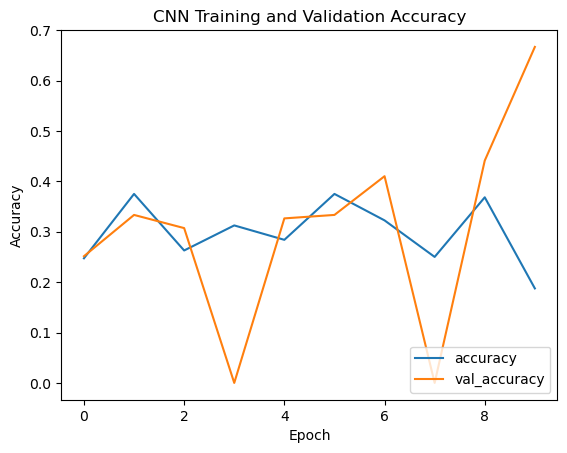

In [36]:
# Plot training history for CNN
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='val_accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

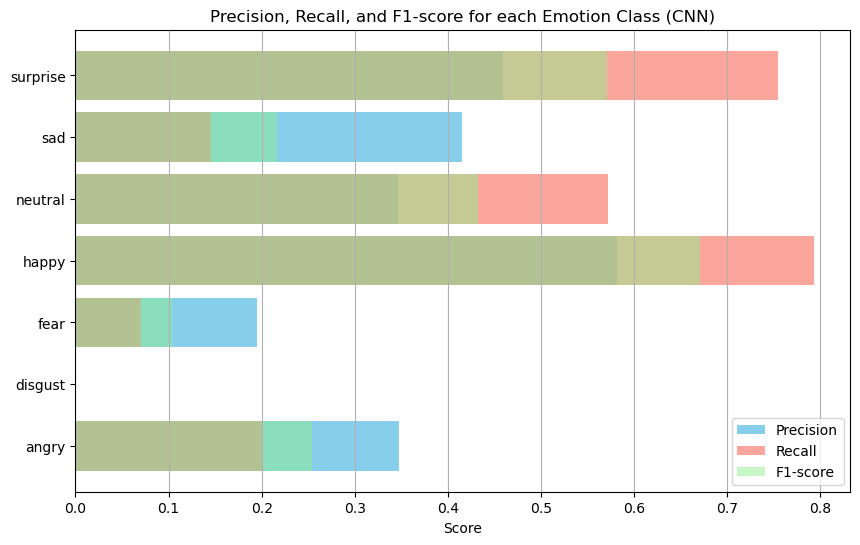

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the classification report data for CNN
report_data_cnn = classification_report(true_classes_cnn, y_pred_classes_cnn, target_names=class_labels_cnn, output_dict=True)

# Extract precision, recall, and F1-score for each emotion class for CNN
precision_cnn = [report_data_cnn[label]['precision'] for label in class_labels_cnn]
recall_cnn = [report_data_cnn[label]['recall'] for label in class_labels_cnn]
f1_score_cnn = [report_data_cnn[label]['f1-score'] for label in class_labels_cnn]

# Plot the metrics for CNN
plt.figure(figsize=(10, 6))

plt.barh(class_labels_cnn, precision_cnn, color='skyblue', label='Precision')
plt.barh(class_labels_cnn, recall_cnn, color='salmon', alpha=0.7, label='Recall')
plt.barh(class_labels_cnn, f1_score_cnn, color='lightgreen', alpha=0.5, label='F1-score')

plt.xlabel('Score')
plt.title('Precision, Recall, and F1-score for each Emotion Class (CNN)')
plt.legend()
plt.grid(axis='x')

plt.show()


### Logistic Regression

In [61]:
# Flatten the image data
train_images, train_labels = next(train_generator)
train_images = train_images.reshape(train_images.shape[0], -1)
validation_images, validation_labels = next(validation_generator)
validation_images = validation_images.reshape(validation_images.shape[0], -1)
test_images, test_labels = next(test_generator)
test_images = test_images.reshape(test_images.shape[0], -1)





In [92]:
# Flatten the image data for all classes
train_images_list = []
train_labels_list = []
for i in range(len(train_generator)):
    train_images_batch, train_labels_batch = next(train_generator)
    train_images_batch_flattened = train_images_batch.reshape(train_images_batch.shape[0], -1)
    train_images_list.append(train_images_batch_flattened)
    train_labels_list.append(train_labels_batch)

validation_images_list = []
validation_labels_list = []
for i in range(len(validation_generator)):
    validation_images_batch, validation_labels_batch = next(validation_generator)
    validation_images_batch_flattened = validation_images_batch.reshape(validation_images_batch.shape[0], -1)
    validation_images_list.append(validation_images_batch_flattened)
    validation_labels_list.append(validation_labels_batch)

test_images_list = []
test_labels_list = []
for i in range(len(test_generator)):
    test_images_batch, test_labels_batch = next(test_generator)
    test_images_batch_flattened = test_images_batch.reshape(test_images_batch.shape[0], -1)
    test_images_list.append(test_images_batch_flattened)
    test_labels_list.append(test_labels_batch)

# Concatenate the flattened images and labels
train_images = np.concatenate(train_images_list, axis=0)
train_labels = np.concatenate(train_labels_list, axis=0)
validation_images = np.concatenate(validation_images_list, axis=0)
validation_labels = np.concatenate(validation_labels_list, axis=0)
test_images = np.concatenate(test_images_list, axis=0)
test_labels = np.concatenate(test_labels_list, axis=0)


In [105]:
# Define and train the logistic regression model
logistic_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', input_shape=(IMG_SIZE * IMG_SIZE * 3,))
])

logistic_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])




In [106]:
history = logistic_model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                             validation_data=(validation_images, validation_labels), verbose=1)

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.1968 - loss: 2.1507 - val_accuracy: 0.1968 - val_loss: 1.9875
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.2053 - loss: 2.1021 - val_accuracy: 0.1748 - val_loss: 1.9910
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2121 - loss: 2.0720 - val_accuracy: 0.2540 - val_loss: 2.0215
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2240 - loss: 2.0581 - val_accuracy: 0.2545 - val_loss: 2.2340
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2216 - loss: 2.0522 - val_accuracy: 0.1779 - val_loss: 2.2659
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2207 - loss: 2.0397 - val_accuracy: 0.2612 - val_loss: 2.0061
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.2261 - loss: 2.0079 - val_accuracy: 0.2593 - val_loss: 2.0515
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2277 - loss: 2.0162 - val_accur

In [95]:
history = logistic_model.fit(train_images, train_labels, epochs=20,
                             validation_data=(validation_images, validation_labels), verbose=1)

Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.2048 - loss: 2.1240 - val_accuracy: 0.2490 - val_loss: 1.8905
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2130 - loss: 2.0469 - val_accuracy: 0.2063 - val_loss: 2.1802
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2122 - loss: 2.1051 - val_accuracy: 0.2501 - val_loss: 2.4763
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2171 - loss: 2.1007 - val_accuracy: 0.2216 - val_loss: 1.9341
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2299 - loss: 2.0337 - val_accuracy: 0.2055 - val_loss: 2.0104
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2330 - loss: 2.0149 - val_accuracy: 0.1924 - val_loss: 2.1326
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2298 - loss: 2.0356 - val_accuracy: 0.1717 - val_loss: 2.1797
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2279 - loss: 2.0416 - val_accuracy: 

In [107]:
# Evaluate the model on the test set
test_loss, test_acc = logistic_model.evaluate(test_images, test_labels, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1024 - loss: 2.0225
Test Loss: 2.3384456634521484
Test Accuracy: 0.19326092302799225


In [108]:
# Generate predictions
y_pred = logistic_model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(test_labels, axis=1)


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [109]:
# Generate classification report and confusion matrix
class_labels = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(true_classes, y_pred_classes, target_names=class_labels, labels=np.arange(NUM_CLASSES)))


Classification Report:
              precision    recall  f1-score   support

       angry       0.22      0.02      0.03       479
     disgust       0.00      0.00      0.00        56
        fear       0.16      0.14      0.15       512
       happy       0.39      0.14      0.20       887
     neutral       0.27      0.01      0.03       617
         sad       0.18      0.78      0.29       624
    surprise       0.00      0.00      0.00       416

    accuracy                           0.19      3591
   macro avg       0.17      0.15      0.10      3591
weighted avg       0.22      0.19      0.13      3591



In [110]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(true_classes, y_pred_classes)
print(conf_matrix)

Confusion Matrix:
[[  8   1  81  28   2 359   0]
 [  0   0   4   1   0  51   0]
 [  6   0  71  37   5 393   0]
 [  5   1  83 122   5 671   0]
 [  6   1  60  53   9 488   0]
 [  8   3  73  45  11 484   0]
 [  4   2  67  29   1 313   0]]


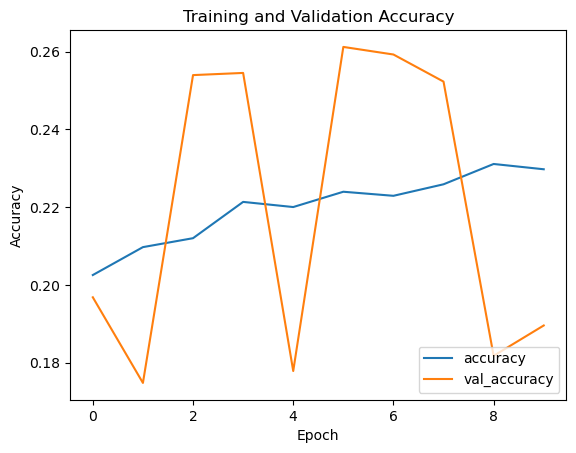

In [111]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

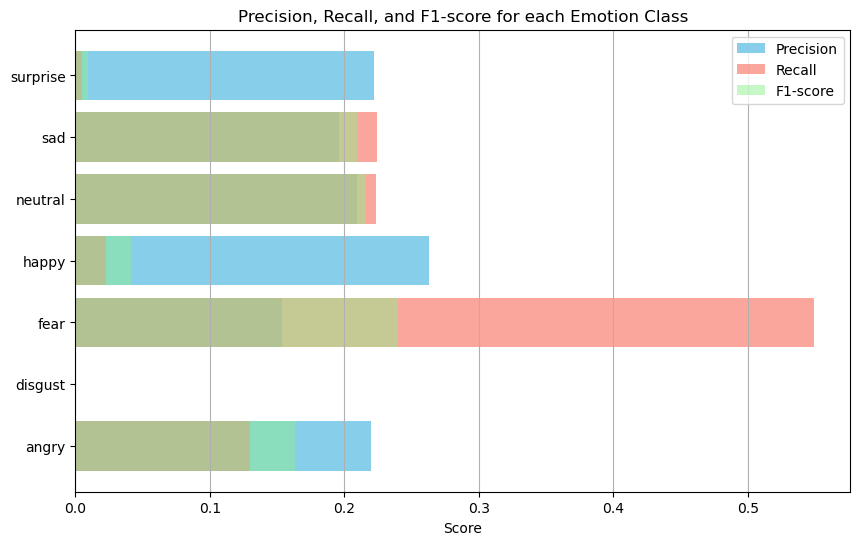

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the classification report data
report_data = classification_report(true_classes, y_pred_classes, target_names=class_labels, labels=np.arange(len(class_labels)), output_dict=True)

# Extract precision, recall, and F1-score for each emotion class
precision = [report_data[label]['precision'] for label in class_labels]
recall = [report_data[label]['recall'] for label in class_labels]
f1_score = [report_data[label]['f1-score'] for label in class_labels]

# Plot the metrics
plt.figure(figsize=(10, 6))

plt.barh(class_labels, precision, color='skyblue', label='Precision')
plt.barh(class_labels, recall, color='salmon', alpha=0.7, label='Recall')
plt.barh(class_labels, f1_score, color='lightgreen', alpha=0.5, label='F1-score')

plt.xlabel('Score')
plt.title('Precision, Recall, and F1-score for each Emotion Class')
plt.legend()
plt.grid(axis='x')

plt.show()
